In [1]:
#importing libraries  

from qiskit import QuantumCircuit 
from qiskit import transpile
from qiskit_aer import AerSimulator

from qiskit_ibm_runtime import SamplerV2
from qiskit_ibm_runtime import QiskitRuntimeService
#from qiskit.circuit.library import MCMT
from qiskit.visualization import plot_distribution
#from qiskit.circuit.library import Diagonal
#from qiskit.circuit.library import RGQFTMultiplier
#from qiskit.circuit.library import Permutation
#from qiskit.circuit.library import QFT

#import numpy as np
#import matplotlib.pyplot as plt
#from qiskit.aqua.components.uncertainty_models import NormalDistribution, UniformDistribution, LogNormalDistributio
#from qiskit_finance.circuit.library.probability_distributions import NormalDistribution, UniformDistribution,LogNormalDistribution

In [2]:
#Defining backend and sampler

backend_aer = AerSimulator()
sampler_aer = SamplerV2(backend_aer)

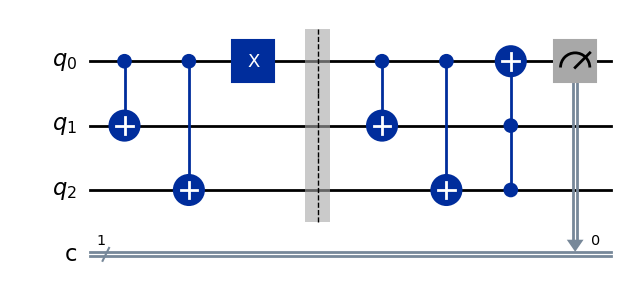

In [3]:
#initializing  quantum circuit
qc = QuantumCircuit(3,1)   #N = 3 qubits. N=1 classical bits
                            # we use 3 qubits: one to put the error and two aux

#building the circuit


#Apply CNOT in (q0,q1)_____> nothing happens (control = 0)

qc.cx(0,1)

#Apply CNOT in (q0, q2)____> nothing happens (control = 0)

qc.cx(0,2)

#Apply X to change q0 from 0 to 1. ------------>this simulates an error in q0 since q0 should be zero but now it became 1

qc.x(0) #Add this to simulate a bit flip error

##########Correcting the error#####################3

qc.barrier()

#Apply CNOT in (q0,q1)--------------->now q1 changes due the 'error'

qc.cx(0,1)

#Apply CNOT in (q0, q2)---------------->Now q2 changes due the 'error'

qc.cx(0,2)

#Apply toffoli in q0 and it will be on its initial states (|1> ----> |0>)

qc.ccx(2,1,0)

#Lets measure q0 -------> The error must be corrected and the result to q0 should be q0=0

qc.measure(0,0)

#Imprimindo o circuito

qc.draw("mpl")


In the circuit above, the error was induce before the barrier and the correction after. 

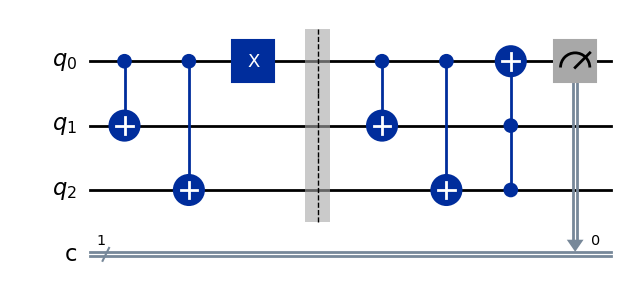

In [4]:
#Transpiling the circuit, it is needed if we want to send to a real QC

qct = transpile(qc,backend = backend_aer) 

#Drawing the trasnpiled circuit
qct.draw("mpl")

In [5]:
job_aer = sampler_aer.run([(qct, None, 1000)]) # running the transpiled circuit 1000 times

result = job_aer.result() #Getting the results   

counts = result[0].data.c.get_counts() #Meassuring results. According to the circuit we measure 'c'
#counts
print('RESULT ', counts)

RESULT  {'0': 1000}


Bit Flip Correction 1000 times
-------------



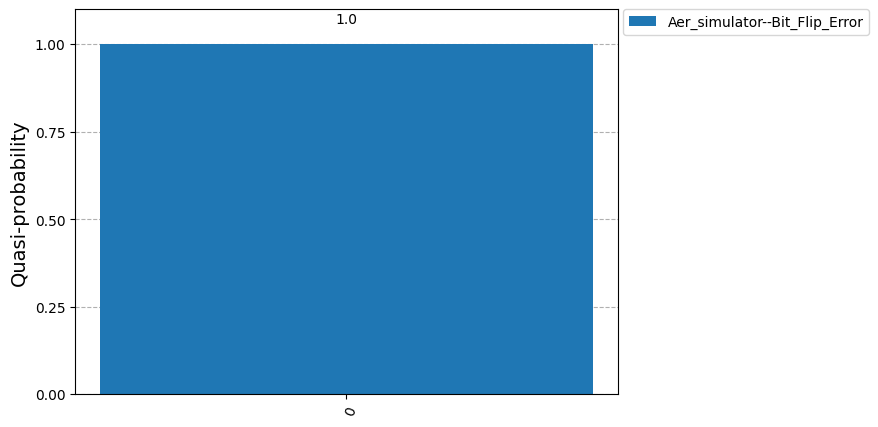

In [6]:
print('Bit Flip Correction 1000 times')
print('-------------\n')
#print(counts)

plot_distribution([counts], legend = ['Aer_simulator--Bit_Flip_Error'])

In [7]:
#The error was corrected 1000 times